In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from pandas import json_normalize
from random import randint
from time import sleep
from bs4 import BeautifulSoup
import requests
import numpy as np
import random

In [2]:
secrets_file = open("secrets.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
# string

In [5]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
           secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [6]:
# secrets_dict

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [8]:
# first playlist, 10k songs, by Willis Orr

In [43]:
playlist = sp.user_playlist_tracks("spotify", "5S8SJdl1BDc0ugpkEvFsIL") 
playlist

{'href': 'https://api.spotify.com/v1/playlists/5S8SJdl1BDc0ugpkEvFsIL/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2017-11-20T02:52:18Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/twgeb7mzdcv4u8h191dxrvlpc'},
    'href': 'https://api.spotify.com/v1/users/twgeb7mzdcv4u8h191dxrvlpc',
    'id': 'twgeb7mzdcv4u8h191dxrvlpc',
    'type': 'user',
    'uri': 'spotify:user:twgeb7mzdcv4u8h191dxrvlpc'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
       'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
       'id': '06HL4z0CvFAxyc27GXpf02',
       'name': 'Taylor Swift',
       'type': 'artist',
       'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
     'available_markets': [],
     'external_urls': {'spotify': 'https://open.spotify.com/album/0HG8fMDhvN2tH5

In [23]:
playlist["total"] 

10000

In [24]:
len(playlist["items"])

100

In [25]:
playlist.keys() 

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [26]:
playlist["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [27]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000)
    return tracks

In [28]:
all_tracks = get_playlist_tracks("5S8SJdl1BDc0ugpkEvFsIL")
len(all_tracks)

10000

In [29]:
tracks0 = json_normalize(all_tracks)
tracks0.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2017-11-20T02:52:18Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,single,[{'external_urls': {'spotify': 'https://open.s...,...,7zgqtptZvhf8GEmdsM2vp2,False,...Ready For It?,0,None,True,1,track,spotify:track:7zgqtptZvhf8GEmdsM2vp2,None
1,2017-11-20T02:42:15Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,4Vxu50qVrQcycjRyJQaZLC,False,Life Changes,62,None,True,8,track,spotify:track:4Vxu50qVrQcycjRyJQaZLC,None
2,2017-11-20T02:36:40Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,6b8Be6ljOzmkOmFslEb23P,False,24K Magic,82,https://p.scdn.co/mp3-preview/3a76820d510fa5f8...,True,1,track,spotify:track:6b8Be6ljOzmkOmFslEb23P,None
3,2017-12-06T01:26:36Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,0afhq8XCExXpqazXczTSve,False,Galway Girl,81,https://p.scdn.co/mp3-preview/9b7635464dc2caea...,True,6,track,spotify:track:0afhq8XCExXpqazXczTSve,None
4,2017-11-20T02:36:14Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,1HNkqx9Ahdgi1Ixy2xkKkL,False,Photograph,87,https://p.scdn.co/mp3-preview/d90f4e5f15d8ed41...,True,6,track,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,None


In [42]:
def expand_list_dict2(row):
    df = json_normalize(row['track.artists'])
    df['song_id'] = row['track.id']
    return df

In [ ]:
tracks0['artists_dfs'] = tracks0.apply(expand_list_dict2, axis=1)
tracks0['artists_dfs'][1]

In [ ]:
artist_df0 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks0['artists_dfs']:
      artist_df0 = pd.concat([artist_df0, mini_df], axis=0)
    
artist_df0

In [ ]:
df_merged0 = pd.merge(left=tracks0,
                    right=artist_df0,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged0.head()

In [ ]:
data0 = df_merged0[['track.name', 'name', 'song_id']]
data0

In [ ]:
data0.isna().sum()

In [ ]:
# second playlist

In [ ]:
all_tracks1 = get_playlist_tracks("6yPiKpy7evrwvZodByKvM9")
len(all_tracks1)

In [ ]:
tracks1 = json_normalize(all_tracks1)
tracks1.head()

In [ ]:
tracks1['artists_dfs'] = tracks1.apply(expand_list_dict2, axis=1)

In [ ]:
artist_df1 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks1['artists_dfs']:
      artist_df1 = pd.concat([artist_df1, mini_df], axis=0)
    
artist_df1

In [ ]:
df_merged1 = pd.merge(left=tracks1,
                    right=artist_df1,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged1.head()

In [ ]:
data1 = df_merged1[['track.name', 'name', 'song_id']]
data1

In [ ]:
# third playlist

In [ ]:
all_tracks2 = get_playlist_tracks("7I6XVNQVayB46Zzh4GNPoU")
len(all_tracks2)

In [ ]:
tracks2 = json_normalize(all_tracks2)
tracks2.head()

In [ ]:
tracks2['artists_dfs'] = tracks2.apply(expand_list_dict2, axis=1)

In [ ]:
artist_df2 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks2['artists_dfs']:
      artist_df2 = pd.concat([artist_df2, mini_df], axis=0)
    
artist_df2

In [ ]:
df_merged2 = pd.merge(left=tracks2,
                    right=artist_df2,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged2.head()

In [ ]:
data2 = df_merged2[['track.name', 'name', 'song_id']]
data2

In [ ]:
# fourth playlist

In [ ]:
all_tracks3 = get_playlist_tracks("5xqpyfZyS1DVysoevdVyEn")
len(all_tracks3)

In [ ]:
tracks3 = json_normalize(all_tracks3)
tracks3.head()

In [ ]:
tracks3['artists_dfs'] = tracks3.apply(expand_list_dict2, axis=1)

In [ ]:
artist_df3 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks3['artists_dfs']:
      artist_df3 = pd.concat([artist_df3, mini_df], axis=0)
    
artist_df3

In [ ]:
df_merged3 = pd.merge(left=tracks3,
                    right=artist_df3,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged3.head()

In [ ]:
data3 = df_merged3[['track.name', 'name', 'song_id']]
data3

In [ ]:
# fifth playlist

In [ ]:
all_tracks5 = get_playlist_tracks("6FKDzNYZ8IW1pvYVF4zUN2")
len(all_tracks5)

In [ ]:
tracks5 = json_normalize(all_tracks5)
tracks5.head()

In [ ]:
tracks5['artists_dfs'] = tracks5.apply(expand_list_dict2, axis=1)

In [ ]:
artist_df5 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks5['artists_dfs']:
      artist_df5 = pd.concat([artist_df5, mini_df], axis=0)
    
artist_df5

In [ ]:
df_merged5 = pd.merge(left=tracks5,
                    right=artist_df5,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged5.head()

In [ ]:
df_merged5.isna().sum()

In [ ]:
data5 = df_merged5[['track.name', 'name', 'song_id']]
data5

In [ ]:
# sixth playlist

In [ ]:
all_tracks7 = get_playlist_tracks("0R8V9dDuScYJ8zIUPHVj1b")
len(all_tracks7)

In [ ]:
tracks7 = json_normalize(all_tracks7)
tracks7.head()

In [ ]:
tracks7['artists_dfs'] = tracks7.apply(expand_list_dict2, axis=1)

In [ ]:
artist_df7 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks7['artists_dfs']:
      artist_df7 = pd.concat([artist_df7, mini_df], axis=0)
    
artist_df7

In [ ]:
df_merged7 = pd.merge(left=tracks7,
                    right=artist_df7,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged7.head()

In [ ]:
data7 = df_merged7[['track.name', 'name', 'song_id']]
data7

In [ ]:
# seventh playlist

In [ ]:
all_tracks8 = get_playlist_tracks("5Rrf7mqN8uus2AaQQQNdc1")
len(all_tracks8)

In [ ]:
tracks8 = json_normalize(all_tracks8)
tracks8.head()

In [ ]:
tracks8['artists_dfs'] = tracks8.apply(expand_list_dict2, axis=1)

In [ ]:
artist_df8 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks8['artists_dfs']:
      artist_df8 = pd.concat([artist_df8, mini_df], axis=0)
    
artist_df8

In [ ]:
df_merged8 = pd.merge(left=tracks8,
                    right=artist_df8,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged8.head()

In [ ]:
data8 = df_merged8[['track.name', 'name', 'song_id']]
data8

In [ ]:
# eightth playlist

In [ ]:
all_tracks9 = get_playlist_tracks("33EoReyaSX0JzfcMpabMre")
len(all_tracks9)

In [ ]:
tracks9 = json_normalize(all_tracks9)
tracks9.head()

In [ ]:
tracks9['artists_dfs'] = tracks9.apply(expand_list_dict2, axis=1)

In [ ]:
artist_df9 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks9['artists_dfs']:
      artist_df9 = pd.concat([artist_df9, mini_df], axis=0)
    
artist_df9

In [ ]:
df_merged9 = pd.merge(left=tracks9,
                    right=artist_df9,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged9.head()

In [ ]:
data9 = df_merged9[['track.name', 'name', 'song_id']]
data9

In [ ]:
final_data = pd.concat([data0, data1, data2, data3, data5, data7, data8, data9], axis=0)
final_data

In [ ]:
final_data = final_data.drop_duplicates()
final_data

In [ ]:
final_data[final_data['song_id'].isna()]

In [ ]:
final_df = final_data.dropna().reset_index(drop=True)
final_df

In [ ]:
final_df['song_id'].nunique()

In [ ]:
chunks = [(i, i+100) for i in range(0, len(final_df), 100)]
chunks
audio_features_list = []
for chunk in chunks:
    id_list100 = final_df['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

In [9]:
audio_features_df = json_normalize(audio_features_list)
audio_features_df 

NameError: name 'audio_features_list' is not defined

In [ ]:
audio_features_df.isna().sum()

In [ ]:
audio_features_df = audio_features_df.dropna().reset_index(drop=True)

In [ ]:
audio_features_df = audio_features_df.drop_duplicates()
audio_features_df

In [ ]:
data_audio_ft = pd.merge(left=final_df,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
data_audio_ft

In [10]:
data_audio_ft.drop_duplicates()

NameError: name 'data_audio_ft' is not defined

In [11]:
data_audio_ft.to_csv('audiofeatures.csv', index=False)

NameError: name 'data_audio_ft' is not defined

In [12]:
top200hot = pd.read_csv(r'C:\Users\sorig\Desktop\top200hot.csv')
top200hot

,chart_position,artist,song
0,1,Jack Harlow,lovin on me
1,2,Paul Russell,lil boo thang
2,3,Zach Bryan,i remember everything (feat. kacey musgraves)
3,4,Chris Stapleton,white horse
4,5,Jelly Roll,save me (with lainey wilson)
...,...,...,...
195,96,The Revivalists,good old days
196,97,boygenius,cool about it
197,98,Taylor Swift,august
198,99,AJR,bang!


In [13]:
top200hot['artist_song'] = top200hot['artist'].astype(str)+","+ top200hot["song"].astype(str)
top200hot['artist_song'] = top200hot['artist_song'].str.lower()
top200hot.head(10)

,chart_position,artist,song,artist_song
0,1,Jack Harlow,lovin on me,"jack harlow,lovin on me"
1,2,Paul Russell,lil boo thang,"paul russell,lil boo thang"
2,3,Zach Bryan,i remember everything (feat. kacey musgraves),"zach bryan,i remember everything (feat. kacey ..."
3,4,Chris Stapleton,white horse,"chris stapleton,white horse"
4,5,Jelly Roll,save me (with lainey wilson),"jelly roll,save me (with lainey wilson)"
5,6,Jelly Roll,need a favor,"jelly roll,need a favor"
6,7,Taylor Swift,cruel summer,"taylor swift,cruel summer"
7,8,Austin Williams,90s rap mashup,"austin williams,90s rap mashup"
8,9,David Kushner,daylight,"david kushner,daylight"
9,10,Morgan Wallen,thinkin’ bout me,"morgan wallen,thinkin’ bout me"


In [14]:
data_audio_ft = pd.read_csv(r'C:\Users\sorig\Desktop\audiofeatures.csv')

In [15]:
data_audio_ft

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,...Ready For It?,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,0.615,0.779,2.0,-6.454,1.0,0.1350,0.0665,...,0.1550,0.453,160.000,audio_features,7zgqtptZvhf8GEmdsM2vp2,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198.0,4.0
1,Life Changes,Thomas Rhett,4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7.0,-4.370,1.0,0.0576,0.1000,...,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227.0,4.0
2,24K Magic,Bruno Mars,6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1.0,-4.282,1.0,0.0797,0.0340,...,0.1530,0.632,106.970,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983.0,4.0
3,Galway Girl,Ed Sheeran,0afhq8XCExXpqazXczTSve,0.624,0.876,9.0,-3.374,1.0,0.1000,0.0735,...,0.3270,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827.0,4.0
4,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4.0,-10.480,1.0,0.0476,0.6070,...,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65552,I'm Every Woman,Chaka Khan,14M8Z46sA114emOXJMvyUp,0.539,0.969,0.0,-3.713,0.0,0.0780,0.1040,...,0.3410,0.652,114.465,audio_features,14M8Z46sA114emOXJMvyUp,spotify:track:14M8Z46sA114emOXJMvyUp,https://api.spotify.com/v1/tracks/14M8Z46sA114...,https://api.spotify.com/v1/audio-analysis/14M8...,245120.0,4.0
65553,Rainy Night In Georgia,Brook Benton,1E3N0QEjPYWOxlyVScZtbW,0.512,0.253,7.0,-15.793,1.0,0.0391,0.4170,...,0.0762,0.326,137.082,audio_features,1E3N0QEjPYWOxlyVScZtbW,spotify:track:1E3N0QEjPYWOxlyVScZtbW,https://api.spotify.com/v1/tracks/1E3N0QEjPYWO...,https://api.spotify.com/v1/audio-analysis/1E3N...,249760.0,4.0
65554,The Boys Are Back In Town,Thin Lizzy,0PQa7dlf3QyCvdQ4zc5z2Q,0.449,0.700,8.0,-9.777,1.0,0.0466,0.2160,...,0.1820,0.786,80.631,audio_features,0PQa7dlf3QyCvdQ4zc5z2Q,spotify:track:0PQa7dlf3QyCvdQ4zc5z2Q,https://api.spotify.com/v1/tracks/0PQa7dlf3QyC...,https://api.spotify.com/v1/audio-analysis/0PQa...,266467.0,4.0
65555,"Baby, I Love You",Ramones,29imR7dda5XqwPRFmby7HS,0.735,0.653,8.0,-5.533,1.0,0.0269,0.2020,...,0.0802,0.930,107.779,audio_features,29imR7dda5XqwPRFmby7HS,spotify:track:29imR7dda5XqwPRFmby7HS,https://api.spotify.com/v1/tracks/29imR7dda5Xq...,https://api.spotify.com/v1/audio-analysis/29im...,224560.0,4.0


In [16]:
data_audio_ft = data_audio_ft.dropna().reset_index(drop=True)
data_audio_ft


,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,...Ready For It?,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,0.615,0.779,2.0,-6.454,1.0,0.1350,0.0665,...,0.1550,0.453,160.000,audio_features,7zgqtptZvhf8GEmdsM2vp2,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198.0,4.0
1,Life Changes,Thomas Rhett,4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7.0,-4.370,1.0,0.0576,0.1000,...,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227.0,4.0
2,24K Magic,Bruno Mars,6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1.0,-4.282,1.0,0.0797,0.0340,...,0.1530,0.632,106.970,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983.0,4.0
3,Galway Girl,Ed Sheeran,0afhq8XCExXpqazXczTSve,0.624,0.876,9.0,-3.374,1.0,0.1000,0.0735,...,0.3270,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827.0,4.0
4,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4.0,-10.480,1.0,0.0476,0.6070,...,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65537,I'm Every Woman,Chaka Khan,14M8Z46sA114emOXJMvyUp,0.539,0.969,0.0,-3.713,0.0,0.0780,0.1040,...,0.3410,0.652,114.465,audio_features,14M8Z46sA114emOXJMvyUp,spotify:track:14M8Z46sA114emOXJMvyUp,https://api.spotify.com/v1/tracks/14M8Z46sA114...,https://api.spotify.com/v1/audio-analysis/14M8...,245120.0,4.0
65538,Rainy Night In Georgia,Brook Benton,1E3N0QEjPYWOxlyVScZtbW,0.512,0.253,7.0,-15.793,1.0,0.0391,0.4170,...,0.0762,0.326,137.082,audio_features,1E3N0QEjPYWOxlyVScZtbW,spotify:track:1E3N0QEjPYWOxlyVScZtbW,https://api.spotify.com/v1/tracks/1E3N0QEjPYWO...,https://api.spotify.com/v1/audio-analysis/1E3N...,249760.0,4.0
65539,The Boys Are Back In Town,Thin Lizzy,0PQa7dlf3QyCvdQ4zc5z2Q,0.449,0.700,8.0,-9.777,1.0,0.0466,0.2160,...,0.1820,0.786,80.631,audio_features,0PQa7dlf3QyCvdQ4zc5z2Q,spotify:track:0PQa7dlf3QyCvdQ4zc5z2Q,https://api.spotify.com/v1/tracks/0PQa7dlf3QyC...,https://api.spotify.com/v1/audio-analysis/0PQa...,266467.0,4.0
65540,"Baby, I Love You",Ramones,29imR7dda5XqwPRFmby7HS,0.735,0.653,8.0,-5.533,1.0,0.0269,0.2020,...,0.0802,0.930,107.779,audio_features,29imR7dda5XqwPRFmby7HS,spotify:track:29imR7dda5XqwPRFmby7HS,https://api.spotify.com/v1/tracks/29imR7dda5Xq...,https://api.spotify.com/v1/audio-analysis/29im...,224560.0,4.0


In [17]:
data_audio_ft = data_audio_ft.drop_duplicates()
data_audio_ft

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,...Ready For It?,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,0.615,0.779,2.0,-6.454,1.0,0.1350,0.0665,...,0.1550,0.453,160.000,audio_features,7zgqtptZvhf8GEmdsM2vp2,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198.0,4.0
1,Life Changes,Thomas Rhett,4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7.0,-4.370,1.0,0.0576,0.1000,...,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227.0,4.0
2,24K Magic,Bruno Mars,6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1.0,-4.282,1.0,0.0797,0.0340,...,0.1530,0.632,106.970,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983.0,4.0
3,Galway Girl,Ed Sheeran,0afhq8XCExXpqazXczTSve,0.624,0.876,9.0,-3.374,1.0,0.1000,0.0735,...,0.3270,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827.0,4.0
4,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4.0,-10.480,1.0,0.0476,0.6070,...,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65537,I'm Every Woman,Chaka Khan,14M8Z46sA114emOXJMvyUp,0.539,0.969,0.0,-3.713,0.0,0.0780,0.1040,...,0.3410,0.652,114.465,audio_features,14M8Z46sA114emOXJMvyUp,spotify:track:14M8Z46sA114emOXJMvyUp,https://api.spotify.com/v1/tracks/14M8Z46sA114...,https://api.spotify.com/v1/audio-analysis/14M8...,245120.0,4.0
65538,Rainy Night In Georgia,Brook Benton,1E3N0QEjPYWOxlyVScZtbW,0.512,0.253,7.0,-15.793,1.0,0.0391,0.4170,...,0.0762,0.326,137.082,audio_features,1E3N0QEjPYWOxlyVScZtbW,spotify:track:1E3N0QEjPYWOxlyVScZtbW,https://api.spotify.com/v1/tracks/1E3N0QEjPYWO...,https://api.spotify.com/v1/audio-analysis/1E3N...,249760.0,4.0
65539,The Boys Are Back In Town,Thin Lizzy,0PQa7dlf3QyCvdQ4zc5z2Q,0.449,0.700,8.0,-9.777,1.0,0.0466,0.2160,...,0.1820,0.786,80.631,audio_features,0PQa7dlf3QyCvdQ4zc5z2Q,spotify:track:0PQa7dlf3QyCvdQ4zc5z2Q,https://api.spotify.com/v1/tracks/0PQa7dlf3QyC...,https://api.spotify.com/v1/audio-analysis/0PQa...,266467.0,4.0
65540,"Baby, I Love You",Ramones,29imR7dda5XqwPRFmby7HS,0.735,0.653,8.0,-5.533,1.0,0.0269,0.2020,...,0.0802,0.930,107.779,audio_features,29imR7dda5XqwPRFmby7HS,spotify:track:29imR7dda5XqwPRFmby7HS,https://api.spotify.com/v1/tracks/29imR7dda5Xq...,https://api.spotify.com/v1/audio-analysis/29im...,224560.0,4.0


In [18]:
# clustering

In [19]:
features_clust = data_audio_ft.drop(['track.name', 'name', 'song_id', 'id', 'uri', 'track_href', 'analysis_url', 'type'], axis=1)
features_clust

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.615,0.779,2.0,-6.454,1.0,0.1350,0.0665,0.000000,0.1550,0.453,160.000,208198.0,4.0
1,0.687,0.845,7.0,-4.370,1.0,0.0576,0.1000,0.000000,0.0452,0.809,87.972,190227.0,4.0
2,0.818,0.803,1.0,-4.282,1.0,0.0797,0.0340,0.000000,0.1530,0.632,106.970,225983.0,4.0
3,0.624,0.876,9.0,-3.374,1.0,0.1000,0.0735,0.000000,0.3270,0.781,99.943,170827.0,4.0
4,0.614,0.379,4.0,-10.480,1.0,0.0476,0.6070,0.000464,0.0986,0.201,107.989,258987.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65537,0.539,0.969,0.0,-3.713,0.0,0.0780,0.1040,0.000006,0.3410,0.652,114.465,245120.0,4.0
65538,0.512,0.253,7.0,-15.793,1.0,0.0391,0.4170,0.001840,0.0762,0.326,137.082,249760.0,4.0
65539,0.449,0.700,8.0,-9.777,1.0,0.0466,0.2160,0.000229,0.1820,0.786,80.631,266467.0,4.0
65540,0.735,0.653,8.0,-5.533,1.0,0.0269,0.2020,0.000307,0.0802,0.930,107.779,224560.0,4.0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features_clust)
cluster_stand = scaler.transform(features_clust) 
cluster_stand = pd.DataFrame(cluster_stand, columns = features_clust.columns)

In [21]:
cluster_stand

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.418444,0.457536,-0.902498,0.330590,0.762935,0.556898,-0.519023,-0.650040,-0.282315,0.099765,1.361443,-0.228796,0.206276
1,0.806386,0.741000,0.491224,0.817592,0.762935,-0.305027,-0.404737,-0.650040,-0.941167,1.508069,-1.188642,-0.331456,0.206276
2,1.512225,0.560614,-1.181242,0.838156,0.762935,-0.058922,-0.629898,-0.650040,-0.294316,0.807873,-0.516035,-0.127198,0.206276
3,0.466936,0.874143,1.048713,1.050343,0.762935,0.167138,-0.495142,-0.650040,0.749766,1.397304,-0.764820,-0.442280,0.206276
4,0.413056,-1.260429,-0.345009,-0.610231,0.762935,-0.416387,1.324905,-0.648653,-0.620742,-0.897125,-0.479958,0.061339,0.206276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65537,0.008949,1.273570,-1.459987,0.971123,-1.310727,-0.077853,-0.391091,-0.650023,0.833773,0.886991,-0.250682,-0.017877,0.206276
65538,-0.136529,-1.801588,0.491224,-1.851805,0.762935,-0.511043,0.676715,-0.644538,-0.755152,-0.402636,0.550053,0.008629,0.206276
65539,-0.475978,0.118238,0.769969,-0.445949,0.762935,-0.427523,-0.009001,-0.649355,-0.120302,1.417083,-1.448543,0.104069,0.206276
65540,1.065014,-0.083623,0.769969,0.545815,0.762935,-0.646902,-0.056762,-0.649122,-0.731151,1.986735,-0.487393,-0.135327,0.206276


In [22]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
cluster_stand.to_csv('standard_features.csv')

C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

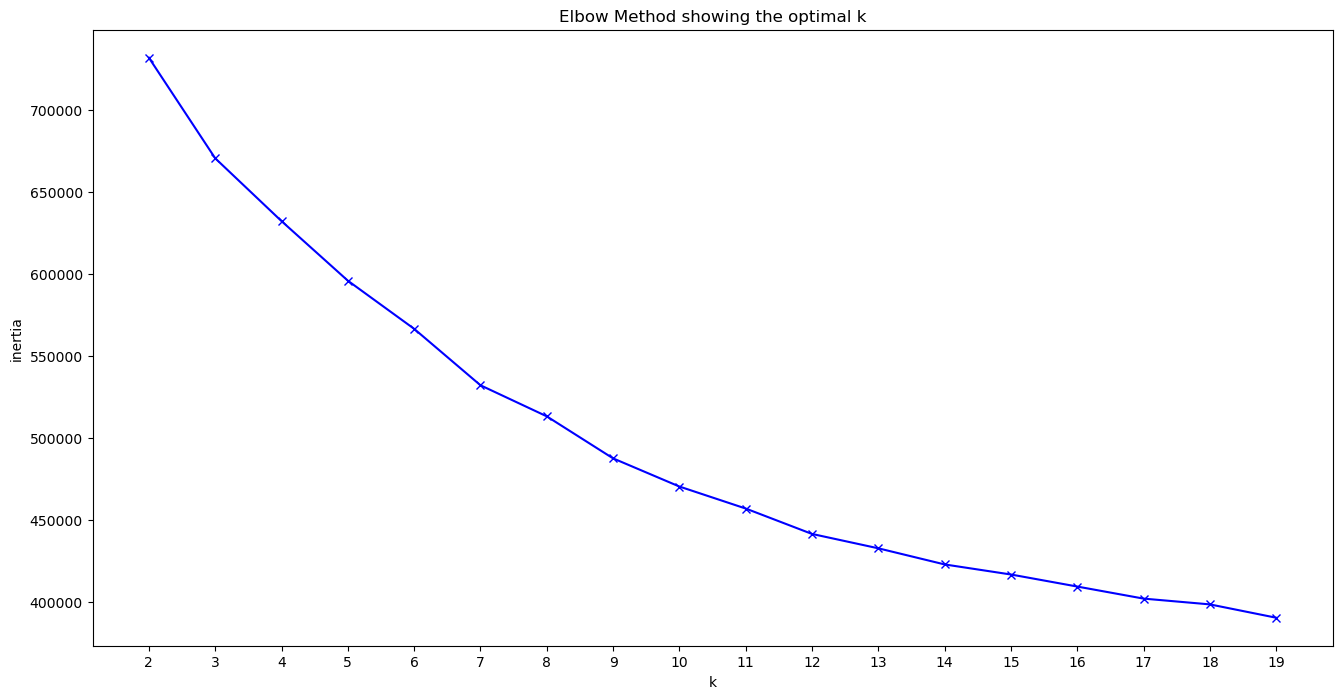

In [23]:
import numpy as np
from sklearn.cluster import KMeans
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(cluster_stand)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

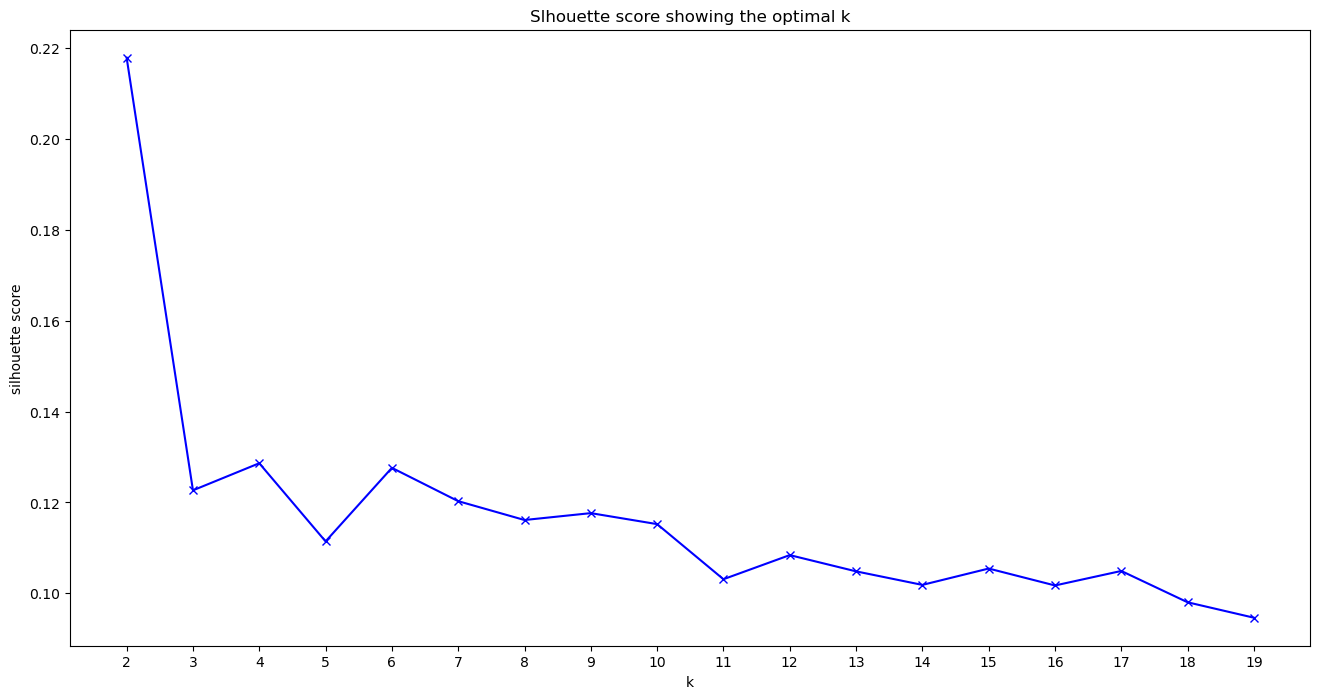

In [24]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(cluster_stand)
    silhouette.append(silhouette_score(cluster_stand, kmeans.predict(cluster_stand)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [25]:
kmeans = KMeans(n_clusters = 17 , random_state=1234).fit(cluster_stand)
clusters = kmeans.predict(cluster_stand)
pd.Series(clusters).value_counts().sort_index()

C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0     6617
1     4128
2     3849
3     2093
4     4617
5     5917
6     6092
7     3251
8     4620
9      102
10    3305
11    5753
12    2852
13    4870
14     535
15    2768
16    4173
dtype: int64

In [26]:
pickle.dump(kmeans, open('kmean.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))


In [27]:
data_audio_ft['cluster'] = clusters
data_audio_ft

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,...Ready For It?,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,0.615,0.779,2.0,-6.454,1.0,0.1350,0.0665,...,0.453,160.000,audio_features,7zgqtptZvhf8GEmdsM2vp2,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198.0,4.0,13
1,Life Changes,Thomas Rhett,4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7.0,-4.370,1.0,0.0576,0.1000,...,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227.0,4.0,0
2,24K Magic,Bruno Mars,6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1.0,-4.282,1.0,0.0797,0.0340,...,0.632,106.970,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983.0,4.0,5
3,Galway Girl,Ed Sheeran,0afhq8XCExXpqazXczTSve,0.624,0.876,9.0,-3.374,1.0,0.1000,0.0735,...,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827.0,4.0,0
4,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4.0,-10.480,1.0,0.0476,0.6070,...,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987.0,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65537,I'm Every Woman,Chaka Khan,14M8Z46sA114emOXJMvyUp,0.539,0.969,0.0,-3.713,0.0,0.0780,0.1040,...,0.652,114.465,audio_features,14M8Z46sA114emOXJMvyUp,spotify:track:14M8Z46sA114emOXJMvyUp,https://api.spotify.com/v1/tracks/14M8Z46sA114...,https://api.spotify.com/v1/audio-analysis/14M8...,245120.0,4.0,8
65538,Rainy Night In Georgia,Brook Benton,1E3N0QEjPYWOxlyVScZtbW,0.512,0.253,7.0,-15.793,1.0,0.0391,0.4170,...,0.326,137.082,audio_features,1E3N0QEjPYWOxlyVScZtbW,spotify:track:1E3N0QEjPYWOxlyVScZtbW,https://api.spotify.com/v1/tracks/1E3N0QEjPYWO...,https://api.spotify.com/v1/audio-analysis/1E3N...,249760.0,4.0,6
65539,The Boys Are Back In Town,Thin Lizzy,0PQa7dlf3QyCvdQ4zc5z2Q,0.449,0.700,8.0,-9.777,1.0,0.0466,0.2160,...,0.786,80.631,audio_features,0PQa7dlf3QyCvdQ4zc5z2Q,spotify:track:0PQa7dlf3QyCvdQ4zc5z2Q,https://api.spotify.com/v1/tracks/0PQa7dlf3QyC...,https://api.spotify.com/v1/audio-analysis/0PQa...,266467.0,4.0,0
65540,"Baby, I Love You",Ramones,29imR7dda5XqwPRFmby7HS,0.735,0.653,8.0,-5.533,1.0,0.0269,0.2020,...,0.930,107.779,audio_features,29imR7dda5XqwPRFmby7HS,spotify:track:29imR7dda5XqwPRFmby7HS,https://api.spotify.com/v1/tracks/29imR7dda5Xq...,https://api.spotify.com/v1/audio-analysis/29im...,224560.0,4.0,0


In [28]:
data_audio_ft_clusters = data_audio_ft[['track.name' , 'name', 'cluster']]
data_audio_ft_clusters['artist_song'] = data_audio_ft_clusters['name'].astype(str)+","+data_audio_ft_clusters['track.name'].astype(str)
data_audio_ft_clusters['artist_song'] =data_audio_ft_clusters['artist_song'].str.lower()
data_audio_ft_clusters

C:\Users\sorig\AppData\Local\Temp\ipykernel_1088\4185954062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_audio_ft_clusters['artist_song'] = data_audio_ft_clusters['name'].astype(str)+","+data_audio_ft_clusters['track.name'].astype(str)
C:\Users\sorig\AppData\Local\Temp\ipykernel_1088\4185954062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_audio_ft_clusters['artist_song'] =data_audio_ft_clusters['artist_song'].str.lower()


,track.name,name,cluster,artist_song
0,...Ready For It?,Taylor Swift,13,"taylor swift,...ready for it?"
1,Life Changes,Thomas Rhett,0,"thomas rhett,life changes"
2,24K Magic,Bruno Mars,5,"bruno mars,24k magic"
3,Galway Girl,Ed Sheeran,0,"ed sheeran,galway girl"
4,Photograph,Ed Sheeran,6,"ed sheeran,photograph"
...,...,...,...,...
65537,I'm Every Woman,Chaka Khan,8,"chaka khan,i'm every woman"
65538,Rainy Night In Georgia,Brook Benton,6,"brook benton,rainy night in georgia"
65539,The Boys Are Back In Town,Thin Lizzy,0,"thin lizzy,the boys are back in town"
65540,"Baby, I Love You",Ramones,0,"ramones,baby, i love you"


In [29]:
kmeans = pickle.load(open('kmean.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl','rb'))

In [30]:
# function to get the features of the song, if it isn't in our hot songs dataframe

In [31]:
def user_feat(track,artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id['tracks']['items'][0]['id']
    features = sp.audio_features(uri)
    return features

In [93]:
user_feat("enjoy the silence", "depeche mode")

[{'danceability': 0.626,
  'energy': 0.667,
  'key': 0,
  'loudness': -11.817,
  'mode': 0,
  'speechiness': 0.0283,
  'acousticness': 0.209,
  'instrumentalness': 0.000257,
  'liveness': 0.0779,
  'valence': 0.83,
  'tempo': 112.776,
  'type': 'audio_features',
  'id': '4wGSg2Qqpt2sGCWuAZj6EN',
  'uri': 'spotify:track:4wGSg2Qqpt2sGCWuAZj6EN',
  'track_href': 'https://api.spotify.com/v1/tracks/4wGSg2Qqpt2sGCWuAZj6EN',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4wGSg2Qqpt2sGCWuAZj6EN',
  'duration_ms': 257631,
  'time_signature': 4}]

In [ ]:
input_user = ''

while input_user!="Exit": 
            input_user = input("Please write the artist followed by the song, comma separated:  ").lower().replace(", ", ",") 
            song = input_user.split(",")[1]
            artist = input_user.split(",")[0]
            if song in top200hot['artist_song'].tolist() and artist in top200hot['artist_song'].tolist():
                print("Maybe you will like this one: \n", random.choice(list(top200hot['artist_song'].str.title())))
            else:
               datafdesong = pd.DataFrame(user_feat(song,artist)).drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)
               cluster_stand_usersong = scaler.transform(datafdesong) 
               cluster_stand_usersong = pd.DataFrame(cluster_stand_usersong, columns = datafdesong.columns)
               the_cluster = kmeans.predict(cluster_stand_usersong)[0]
               rec_song = data_audio_ft_clusters[data_audio_ft_clusters['cluster'] == the_cluster].sample().squeeze()
               print(f"Maybe you will like this one: {rec_song['artist_song']}\n")
           
        
 


            

Please write the artist followed by the song, comma separated:  snow patrol, chasing
Maybe you will like this one: for the likes of you,rot with me

